In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

we have to use feature selection methods for selecting features which influence the price column.
I will use lasso regression for model buliding because this algorithm along with predict it will do feature selection.

In [2]:
df=pd.read_csv("CarPrice.csv")
df.shape

(205, 26)

In [3]:
df.sample(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
64,65,0,mazda 626,gas,std,four,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.390,8.6,84,4800,26,32,11245.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.150,9.5,114,5400,23,28,16845.0
56,57,3,mazda glc,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0


## description of the data

1. this data is about the information about different features of the car with help of that we can predict the prices of car.
2. *** there are total 26 columns (combiation of numerical and categorical variable).
3. **** the columns are 'car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### first step

** as the given data is having a lot of columns including categorical columns so using one hot encoding will not be good so here I will be using one type of encoding.
1. frequency encoding: the categorical columns which have less number of categories I will be using this encoding.


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df["fueltype"].value_counts()
## as the fuel type is having only two categories that are gas and diesel

## so feature encoding replacing an interger(counts) in the place of category value

df["fueltype"]=df['fueltype'].replace({"gas": 185,"diesel" :20})

In [7]:
df["aspiration"].value_counts()
## as the aspiration is having only two categories that are std and turbo.

## so feature encoding replacing an interger(counts) in the place of category value.

df["aspiration"]= df["aspiration"].replace({"std":168,"turbo":37})

In [8]:
df["doornumber"].value_counts()
## as the door number is having only two categories that are four and two.

## so feature encoding replacing an interger(counts) in the place of category value.

df["doornumber"]=df["doornumber"].replace({"four":115, "two":90})

In [9]:
df["carbody"].value_counts()
## as the carbody is having  categories that are sedan ,hatchback,wagon,hardtop,convertible
## so feature encoding replacing an interger(counts) in the place of category value.

df["carbody"]= df["carbody"].replace({"sedan":96,"hatchback":70,"wagon":25,"hardtop":8,"convertible":6})

In [10]:

df["drivewheel"].value_counts()

## as the carbody is having only three categories that are fwd,rwd,4wd
## so feature encoding replacing an interger(counts) in the place of category value.
df["drivewheel"]=df["drivewheel"].replace({"fwd":120,"rwd":76,"4wd":9})

In [11]:
df["enginelocation"].value_counts()
## as the carbody is having only two categories that are front,rear
## so feature encoding replacing an interger(counts) in the place of category value.

df["enginelocation"]=df["enginelocation"].replace({"front":202,"rear":3})

In [12]:
df["fuelsystem"].value_counts()
df_frequency= df["fuelsystem"].value_counts().to_dict()
df["fuelsystem"]=df["fuelsystem"].map(df_frequency)

In [13]:
df["enginetype"].value_counts()
df_frequency= df["enginetype"].value_counts().to_dict()
df["enginetype"]=df["enginetype"].map(df_frequency)

In [14]:
df["cylindernumber"].value_counts()

df_frequency= df["cylindernumber"].value_counts().to_dict()
df["cylindernumber"]=df["cylindernumber"].map(df_frequency)

In [15]:
df.sample(4)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
21,22,1,dodge rampage,185,168,90,70,120,202,93.7,...,90,66,2.97,3.230,9.41,68,5500,37,41,5572.0
55,56,3,mazda 626,185,168,90,70,76,202,95.3,...,70,3,3.33,3.255,9.40,101,6000,17,23,10945.0
58,59,3,mazda glc 4,185,168,90,70,76,202,95.3,...,80,94,3.33,3.255,9.40,135,6000,16,23,15645.0
16,17,0,bmw x5,185,168,90,96,76,202,103.5,...,209,94,3.62,3.390,8.00,182,5400,16,22,41315.0


In [16]:
# ## extract first word of the car name and the collect the frequency of the car and replcae with the frequency value.

list1=df["CarName"].str.split(" ").str[0]
# Convert the Series to a list
first_words_list = list1.tolist()


In [17]:
df['first_words_list']=first_words_list
df.sample(3)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,first_words_list
155,156,0,toyota carina,185,168,115,25,9,202,95.7,...,66,3.05,3.03,9.0,62,4800,27,32,8778.0,toyota
98,99,2,nissan clipper,185,168,90,8,120,202,95.1,...,66,3.15,3.29,9.4,69,5200,31,37,8249.0,nissan
67,68,-1,buick electra 225 custom,20,37,115,96,76,202,110.0,...,20,3.58,3.64,21.5,123,4350,22,25,25552.0,buick


In [18]:
df.drop('CarName', axis=1, inplace=True)

In [19]:
df["first_words_list"].value_counts()

df_frequency= df["first_words_list"].value_counts().to_dict()
df["first_words_list"]=df["first_words_list"].map(df_frequency)

In [20]:
df.sample(6)
## car_id will not influence the price of the car so dropping the car id column
df.drop('car_ID', axis=1, inplace=True)

In [21]:
list_new=df.columns
list_new.dtype

dtype('O')

In [22]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [23]:
df_new= scaler.fit_transform(df)

In [24]:
data=pd.DataFrame(df_new)
data.columns = list_new

In [25]:
data.sample(6)
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'first_words_list'],
      dtype='object')

## handle the outlier
## do feature selection with help of exhaustive feature selection (linear regression)
## with highest accuracy choose that one.

*** explain about your findings


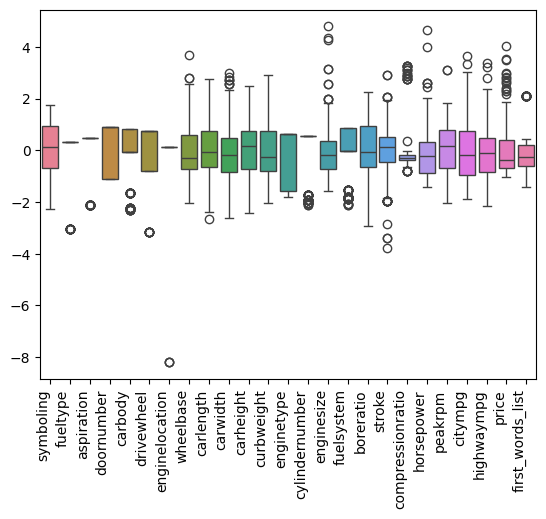

In [26]:
## we have to deal with outlier first

sns.boxplot(data=data)

plt.xticks(rotation=90, ha='right')
plt.show()

## this columns are having outliers
1. fueltype
2. aspiration
3. carbody
4. drivewheel
5. carlength
6. carwidth
7. carheigth
8. cylindernumber
9. enginesize
10. fuel system
11. stroke
12. comprationratio
13. horsepower
14. peakrpm
15. citympg
16. highwaympg
17. price
18. first word letters


In [27]:
# ## extracting the columns which are having outlier and checking the distribution is skew or no
data1= data[['fueltype','aspiration','carbody','drivewheel','carlength','carwidth','carheight','cylindernumber','enginesize','fuelsystem','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','first_words_list']]
skwed =[]
for col in data.columns:
    skwed.append(data[col].skew())


print(skwed)
## the columns skew wich is close to zero are close to normal distribution and the columns skew which are not close to zero are either rightly skewed
## or leftly skewed



[0.2110722720578876, -2.7326188416471817, -1.673831625093199, -0.2475516412980024, -1.092189412070545, -1.3395087688380827, -8.1435307507926, 1.0502137758714898, 0.15595377132154942, 0.9040034987862507, 0.06312273247192964, 0.6813981890525873, -1.0004774348318461, -1.348271009985276, 1.9476550452788113, -0.8934283642244548, 0.02015641810423478, -0.6897045784233894, 2.6108624576151542, 1.4053101543373119, 0.07515872237118897, 0.6637040288148165, 0.5399971878746751, 1.7776781560914454, 1.0626729363867977]


<Axes: xlabel='fueltype', ylabel='Density'>

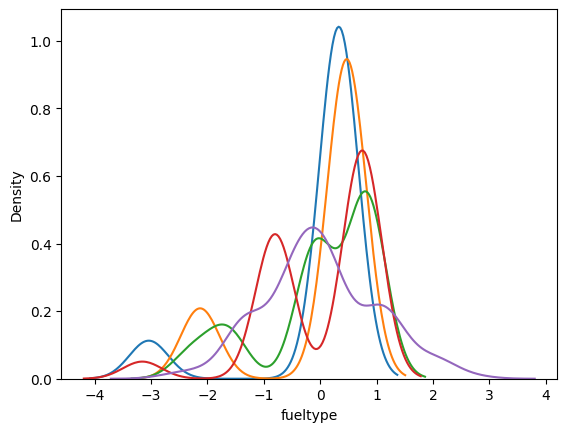

In [28]:
sns.kdeplot(data=data, x="fueltype")
sns.kdeplot(data=data, x="aspiration")

sns.kdeplot(data=data, x="carbody")

sns.kdeplot(data=data, x="drivewheel")

sns.kdeplot(data=data, x="carlength")


<Axes: xlabel='carwidth', ylabel='Density'>

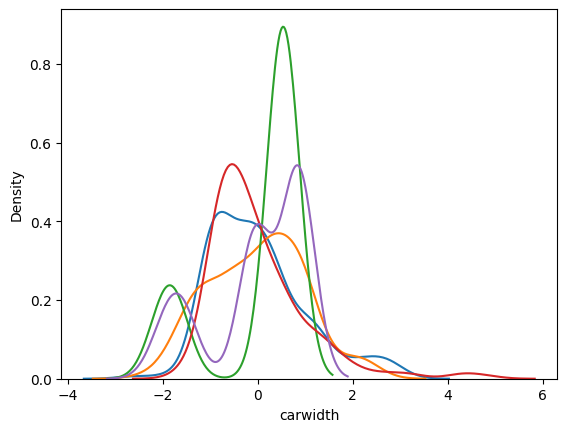

In [29]:
sns.kdeplot(data=data, x="carwidth")
sns.kdeplot(data=data, x="carheight")

sns.kdeplot(data=data, x="cylindernumber")

sns.kdeplot(data=data, x="enginesize")

sns.kdeplot(data=data, x="fuelsystem")

<Axes: xlabel='stroke', ylabel='Density'>

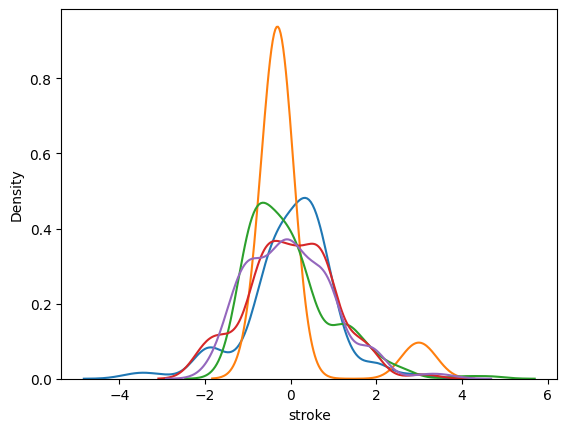

In [30]:
# highwaympg
# price
# first word letters
sns.kdeplot(data=data, x="stroke")
sns.kdeplot(data=data, x="compressionratio")

sns.kdeplot(data=data, x="horsepower")


sns.kdeplot(data=data, x="peakrpm")

sns.kdeplot(data=data, x="citympg")

<Axes: xlabel='highwaympg', ylabel='Density'>

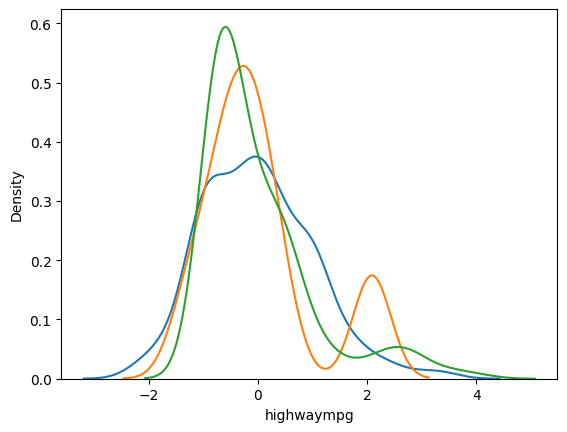

In [31]:
sns.kdeplot(data=data, x="highwaympg")
sns.kdeplot(data=data, x="first_words_list")

sns.kdeplot(data=data, x="price")


In [32]:
## we will first replace the outlier with mode for categorical variable and mean for numberical variable
## categorical columns are CarName, fueltype ,aspiration,doornumber ,carbody , drivewheel, enginelocation,enginetype, cylindernumber , fuelsystem
## other columns are numerical columns

In [33]:
from sklearn.preprocessing import RobustScaler
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    # Handle outliers in numerical columns (e.g., replace with median)
    median = data[col].median()
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    upper_bound = data[col].quantile(0.75) + 1.5 * IQR

    data[col] = data[col].apply(lambda x: median if x > upper_bound else x)

    scaler = RobustScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

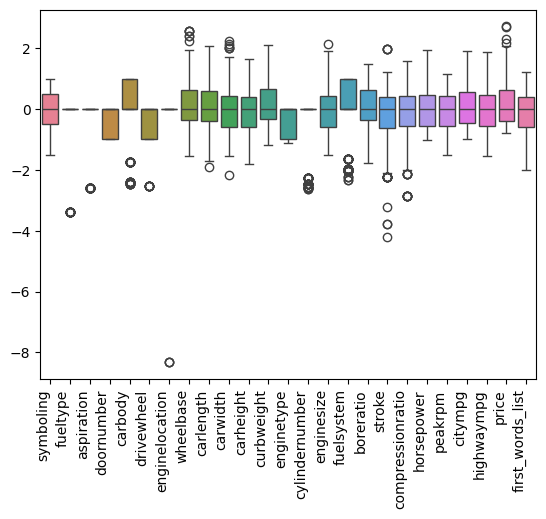

In [34]:
sns.boxplot(data=data)

plt.xticks(rotation=90, ha='right')
plt.show()

In [35]:
## replacing outliers with the mean
def replace_outliers_with_mean(column):
    mean = column.mean()
    std = column.std()
    threshold = 2 # Adjust this threshold based on your criteria

    column = column.apply(lambda x: mean if abs(x - mean) > threshold * std else x)
    return column

# Replace outliers in column 'A' with the mean
data['price'] = replace_outliers_with_mean(data['price'])
data['compressionratio']= replace_outliers_with_mean(data['compressionratio'])
data['wheelbase']= replace_outliers_with_mean(data['wheelbase'])
data['carwidth']=replace_outliers_with_mean(data['carwidth'])
data['stroke']=replace_outliers_with_mean(data['stroke'])

In [36]:
def replace_outliers_with_max(column):
    max_ = column.max()
    std = column.std()
    threshold = 2 # Adjust this threshold based on your criteria

    column = column.apply(lambda x: max_ if abs(x - column.mean()) > threshold * std else x)
    return column



data['fuelsystem']= replace_outliers_with_max(data['fuelsystem'])
data['cylindernumber']= replace_outliers_with_max(data['cylindernumber'])
data['carbody']= replace_outliers_with_max(data['carbody'])

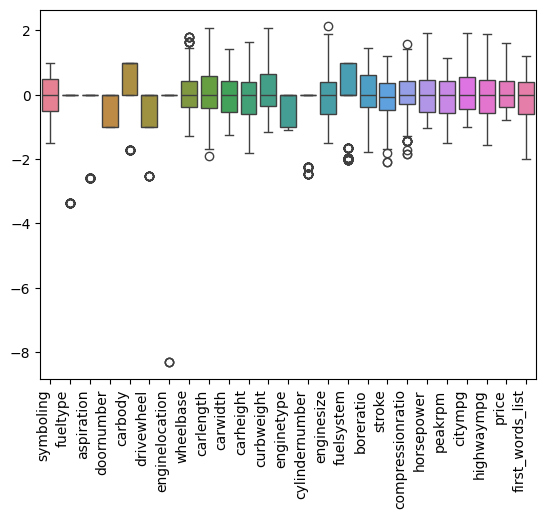

In [37]:
## we have to deal with outlier first

sns.boxplot(data=data)

plt.xticks(rotation=90, ha='right')
plt.show()

In [38]:
## now its time to do feature selection with exhaustive feature selection
## importing the impotant libreries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [39]:
#!pip install --upgrade scikit-learn mlxtend

In [40]:

#default_banner.sample(3)


# Define the new order of columns
new_order =['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg','first_words_list' ,'price']

# Reorder the columns
data = data[new_order]



In [45]:
X= data.iloc[:,:-1]
y=data['price']

In [42]:
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
## from this train and test data split whole data will be splited into two parts where tarin data will have 60% of the data and test data have 30% of the data

In [72]:
y_train.shape

(143,)

In [55]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression()
reg.fit(X_train, y_train)
print(reg.intercept_)
print(reg.coef_)

0.029766182863041432
[ 0.12089343 -0.18579142 -0.04373399  0.01335529 -0.03153457 -0.16185255
  0.08405081  0.18928268  0.23505037  0.11312498  0.02025895 -0.36976734
 -0.04368728  0.07562909  0.36509627  0.103573   -0.17943327 -0.17993636
 -0.06551312  0.23827112  0.19359704 -0.26010285  0.07866121  0.05756296]


The regression line equation is


Y = 0.029 + 0.12*x1 + (-0.18)* x2 + (0.04)*x3 .........(up to 24 terms)

In [101]:
lasso = Lasso(alpha=0.01)  # You can adjust the alpha parameter for regularization strength
lasso.fit(X_train, y_train)

##alpha = 0.1 -> 0.44 accuracy
## alpha = 0.01 -> 0.54 accuracy
## alpha = 0.5 -> -0.18 accuracy



Lasso(alpha=0.01)

In [102]:
from sklearn.metrics import r2_score



y_pred= lasso.predict(X_test)
y_pred.shape
lasso_score = r2_score(y_test, y_pred)
print(f'Lasso Regression R^2 Score: {lasso_score}')
## calculating the r2 score

Lasso Regression R^2 Score: 0.5993056260444498


In [103]:
n = 205  # Number of samples
p = 24 # Number of features
adjusted_r2 = 1 - (1 -lasso_score) * (n - 1) / (n - p - 1)
adjusted_r2

0.5458797095170431

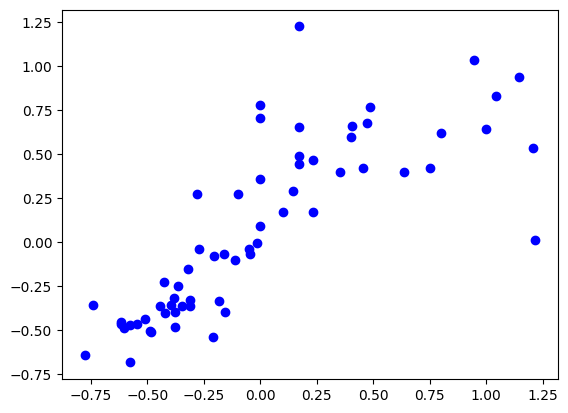

In [107]:
plt.scatter(y_test, y_pred, color='blue', label='Actual Data Points')

So in conclusion when alpha is 0.01 the adjusted score of r2 is 0.54 which is the highest.



** what is done in the notebook ?

I have taken one data from the kaggle website which is about car prices in the America. this data mainly has 26 columns with target column that is price and other are independent columns.

step 1: Because data have categorical columns so first I have replace with the total occurance of the categories in that categorical columns.

step 2: I have handeled outliers of the data by replacing with mean , mode according to the data

step 3: then I used Lasso regression algorithm to predict the data . this algorithm will automatically do feature selection internally according to alpha values.
the highest adjusted r2 score is choosen.
